# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm, tqdm_notebook, tnrange
import tensorflow as tf
import math
import os
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from scipy import stats

In [2]:
import pickle

pickle_file = '/home/shreyas/Documents/sdcND/data/udacity_traffic_signs.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  X_train = pickle_data['train_dataset']
  y_train = pickle_data['train_labels']
  X_valid = pickle_data['valid_dataset']
  y_valid = pickle_data['valid_labels']
  X_test = pickle_data['test_dataset']
  y_test = pickle_data['test_labels']
  del pickle_data  # Free up memory


print('Data and modules loaded.')

Data and modules loaded.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
# number of training examples
n_train = len(X_train)
# TODO: number of testing examples
n_test = len(X_test)
# TODO: what's the shape of an image?
image_shape = X_train[0].shape
# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def weights(shape):
    return tf.Variable(tf.truncated_normal(shape, mean=0.0, stddev=0.1))


def biases(length):
    return tf.Variable(tf.zeros(length))


def conv2d(x, nb_filter,
           filter_size=[1,1],  
           strides=[1,1,1,1],
           padding='SAME',
           batch_norm=False,  
           is_training=False):
    
    # get shape for weight tensor
    nb_channel = int(x.get_shape()[3])
    shape = [filter_size[0], filter_size[1], nb_channel, nb_filter]
    
    # initiate the weights
    W = weights(shape)
    # convolution
    layer = tf.nn.conv2d(x, W, strides=strides, padding=padding)
    
    # batch_normalisation   
    if batch_norm:
        layer = tf.contrib.layers.batch_norm(layer, scale=True, updates_collections=None, is_training=is_training)
        
    return layer



def flatten(layer):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features], name='flatten')
    return layer_flat, num_features



def dense(x, 
          nb_input, 
          nb_output,
          batch_norm=False, 
          is_training=False,
          relu=True):
    
    # get shape for weight tensor
    shape = [nb_input, nb_output]
    # intitiate weight matrix
    W = weights(shape)
    layer = tf.matmul(x,W)
    
    if batch_norm:
        layer = tf.contrib.layers.batch_norm(layer, scale=True, updates_collections=None, is_training=is_training)
    else:
        b = biases(nb_output)
        layer = tf.add(layer, b)
    
    # perform relu activation
    if relu:
        layer = tf.nn.relu(layer)
    
    return layer


def max_pool(x, ksize=[1,3,3,1], strides=[1,2,2,1], padding='SAME'):
    return tf.nn.max_pool(x, ksize=ksize, strides=strides, padding=padding)
    

def avg_pool(x, ksize=[1,3,3,1], strides=[1,2,2,1], padding='SAME'):
    return tf.nn.avg_pool(x, ksize=ksize, strides=strides, padding=padding)

def combined_pool(x):
    return tf.add(max_pool(x),avg_pool(x))

In [8]:
def model1(x, keep_prob, is_training):
    # learning color space 
    color_s1 = conv2d(X,10, batch_norm=True, is_training=is_training)
    color_s2 = conv2d(color_s1,3, batch_norm=True, is_training=is_training)
    
    # block 1 - convolution 
    conv1x1 = conv2d(color_s2, nb_filter=64, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    conv5x5 = conv2d(conv1x1, nb_filter=64, filter_size=[5,5], batch_norm=True, is_training=is_training)
    conv5x5 = tf.nn.relu(conv5x5)
    conv1x1 = conv2d(conv5x5, nb_filter=128, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    
    pool = combined_pool(conv1x1)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # block 2 
    
    conv1x1 = conv2d(dropout, nb_filter=128, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    conv5x5 = conv2d(conv1x1, nb_filter=128, filter_size=[5,5], batch_norm=True, is_training=is_training)
    conv5x5 = tf.nn.relu(conv5x5)
    conv1x1 = conv2d(conv5x5, nb_filter=256, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    
    pool = combined_pool(conv1x1)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # block 3 
    conv1x1 = conv2d(dropout, nb_filter=128, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    conv3x3 = conv2d(conv1x1, nb_filter=128, filter_size=[3,3], batch_norm=True, is_training=is_training)
    conv3x3 = tf.nn.relu(conv3x3)
    conv1x1 = conv2d(conv3x3, nb_filter=256, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    
    pool = combined_pool(conv1x1)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # flatten the layer
    flat, features = flatten(dropout)
    
    # frist dense layer
    fc1 = dense(flat, features, 4096, batch_norm=True, is_training=is_training)
    dropout = tf.nn.dropout(fc1, keep_prob)
    
    # output layer
    output = dense(dropout, 4096, 43, relu=False) 
    return output

In [9]:
def model2(x, keep_prob, is_training):
    # learning color space 
    color_s1 = conv2d(X,10, batch_norm=True, is_training=is_training)
    color_s2 = conv2d(color_s1,3, batch_norm=True, is_training=is_training)
    
    # block 1 - convolution 
    conv1x1 = conv2d(color_s2, nb_filter=64, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    conv5x5 = conv2d(conv1x1, nb_filter=64, filter_size=[5,5], batch_norm=True, is_training=is_training)
    conv5x5 = tf.nn.relu(conv5x5)
    conv1x1 = conv2d(conv5x5, nb_filter=256, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    
    pool = combined_pool(conv1x1)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # block 2 
    
    conv1x1 = conv2d(dropout, nb_filter=128, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    conv5x5 = conv2d(conv1x1, nb_filter=128, filter_size=[5,5], batch_norm=True, is_training=is_training)
    conv5x5 = tf.nn.relu(conv5x5)
    conv1x1 = conv2d(conv5x5, nb_filter=256, filter_size=[1,1], batch_norm=True, is_training=is_training)
        
    net = tf.add(conv1x1, pool)
    net = tf.nn.relu(net)
    pool = combined_pool(net)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # block 3 
    
    conv1x1 = conv2d(dropout, nb_filter=128, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    conv3x3 = conv2d(conv1x1, nb_filter=128, filter_size=[3,3], batch_norm=True, is_training=is_training)
    conv3x3 = tf.nn.relu(conv3x3)
    conv1x1 = conv2d(conv3x3, nb_filter=256, filter_size=[1,1], batch_norm=True, is_training=is_training)
    
    net = tf.add(conv1x1, pool)
    net = tf.nn.relu(net)
    pool = combined_pool(net)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # flatten the layer
    flat, features = flatten(dropout)
    
    # frist dense layer
    fc1 = dense(flat, features, 4096, batch_norm=True, is_training=is_training)
    dropout = tf.nn.dropout(fc1, keep_prob)
          
    # output layer
    output = dense(dropout, 4096, 43, relu=False) 
    return output

In [10]:
def model3(x, keep_prob, is_training):
    # learning color space 
    color_s1 = conv2d(X,10, batch_norm=True, is_training=is_training)
    color_s2 = conv2d(color_s1,3, batch_norm=True, is_training=is_training)
    
    # block 1 - convolution 
    conv1x1 = conv2d(color_s2, nb_filter=64, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    conv5x5 = conv2d(conv1x1, nb_filter=64, filter_size=[5,5], batch_norm=True, is_training=is_training)
    conv5x5 = tf.nn.relu(conv5x5)
    conv1x1 = conv2d(conv5x5, nb_filter=256, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    
    pool = combined_pool(conv1x1)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # block 2 - inception
    branch_pool = avg_pool(conv1x1)
    branch_pool = conv2d(branch_pool, nb_filter=96, filter_size=[1,1], batch_norm=True, is_training=is_training)
    
    branch_conv1x1 = conv2d(dropout, nb_filter=96, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = conv2d(dropout, nb_filter=64, filter_size=[1,1], batch_norm=True, is_training=is_training)
    branch_conv3x3 = conv2d(conv1x1, nb_filter=96, filter_size=[3,3], batch_norm=True, is_training=is_training)
    branch2_conv3x3 = conv2d(branch_conv3x3, nb_filter=96, filter_size=[3,3], batch_norm=True, is_training=is_training)
        
    net = tf.concat(3,[branch_pool, branch_conv1x1, branch_conv3x3, branch2_conv3x3])
    net = tf.nn.relu(net)
    pool = max_pool(net)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # block 3 - inception
    branch_pool = avg_pool(net)
    branch_pool = conv2d(branch_pool, nb_filter=96, filter_size=[1,1], batch_norm=True, is_training=is_training)
    
    branch_conv1x1 = conv2d(dropout, nb_filter=96, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = conv2d(dropout, nb_filter=64, filter_size=[1,1], batch_norm=True, is_training=is_training)
    branch_conv3x3 = conv2d(conv1x1, nb_filter=96, filter_size=[3,3], batch_norm=True, is_training=is_training)
    branch_conv5x5 = conv2d(conv1x1, nb_filter=96, filter_size=[5,5], batch_norm=True, is_training=is_training)
    
    net = tf.concat(3,[branch_pool, branch_conv1x1, branch_conv3x3, branch_conv5x5])
    net = tf.nn.relu(net)
    pool = max_pool(net)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # flatten the layer
    flat, features = flatten(dropout)
    
    # frist dense layer
    fc1 = dense(flat, features, 4096, batch_norm=True, is_training=is_training)
    dropout = tf.nn.dropout(fc1, keep_prob)
        
    # output layer
    output = dense(dropout, 4096, 43, relu=False) 
    return output

In [11]:
def model4(x, keep_prob, is_training):
    # learning color space 
    color_s1 = conv2d(X,10, batch_norm=True, is_training=is_training)
    color_s2 = conv2d(color_s1,3, batch_norm=True, is_training=is_training)
    
    # block 1 - convolution 
    conv1x1 = conv2d(color_s2, nb_filter=64, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    conv5x5 = conv2d(conv1x1, nb_filter=64, filter_size=[5,5], batch_norm=True, is_training=is_training)
    conv5x5 = tf.nn.relu(conv5x5)
    conv1x1 = conv2d(conv5x5, nb_filter=384, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = tf.nn.relu(conv1x1)
    
    pool = combined_pool(conv1x1)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # block 2 - inception
    branch_pool = avg_pool(conv1x1)
    branch_pool = conv2d(branch_pool, nb_filter=96, filter_size=[1,1], batch_norm=True, is_training=is_training)
    
    branch_conv1x1 = conv2d(dropout, nb_filter=96, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = conv2d(dropout, nb_filter=64, filter_size=[1,1], batch_norm=True, is_training=is_training)
    branch_conv3x3 = conv2d(conv1x1, nb_filter=96, filter_size=[3,3], batch_norm=True, is_training=is_training)
    branch2_conv3x3 = conv2d(branch_conv3x3, nb_filter=96, filter_size=[3,3], batch_norm=True, is_training=is_training)
        
    net = tf.concat(3,[branch_pool, branch_conv1x1, branch_conv3x3, branch2_conv3x3])
    net = tf.add(pool,net)
    net = tf.nn.relu(net)
    pool = max_pool(net)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # block 3 - inception
    branch_pool = avg_pool(net)
    branch_pool = conv2d(branch_pool, nb_filter=96, filter_size=[1,1], batch_norm=True, is_training=is_training)
    
    branch_conv1x1 = conv2d(dropout, nb_filter=96, filter_size=[1,1], batch_norm=True, is_training=is_training)
    conv1x1 = conv2d(dropout, nb_filter=64, filter_size=[1,1], batch_norm=True, is_training=is_training)
    branch_conv3x3 = conv2d(conv1x1, nb_filter=96, filter_size=[3,3], batch_norm=True, is_training=is_training)
    branch_conv5x5 = conv2d(conv1x1, nb_filter=96, filter_size=[5,5], batch_norm=True, is_training=is_training)
    
    net = tf.concat(3,[branch_pool, branch_conv1x1, branch_conv3x3, branch_conv5x5])
    net = tf.add(pool,net)
    net = tf.nn.relu(net)
    pool = max_pool(net)
    dropout = tf.nn.dropout(pool, keep_prob)
    
    # flatten the layer
    flat, features = flatten(dropout)
    
    # frist dense layer
    fc1 = dense(flat, features, 4096, batch_norm=True, is_training=is_training)
    dropout = tf.nn.dropout(fc1, keep_prob)
   
    # output layer
    output = dense(dropout, 4096, 43, relu=False) 
    return output

In [12]:
def get_accuracy(y_pred, y):
    #y_pred = tf.nn.softmax(logits)
    correct_pred = tf.equal(tf.argmax(y_pred,1),y)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    return accuracy

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        acc, cost = sess.run([accuracy,loss], feed_dict={X: batch_x, y: batch_y, keep_prob:1.0, is_training:False})
        total_accuracy += (acc * len(batch_x))
        total_loss += cost
    return total_accuracy/num_examples, total_loss/num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [13]:
# placeholder for input and outputs
X = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int64, (None))
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool, [])

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.
logits =model1(X, keep_prob, is_training)

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, y)
loss = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(3e-4).minimize(loss)

accuracy = get_accuracy(logits, y)

Epoch  1/200: 100%|██████████| 246/246 [00:41<00:00,  5.99batches/s]


Validation accuracy at 0.0592960979346755


Epoch  3/200:   0%|          | 1/246 [00:00<00:34,  7.05batches/s]

Validation accuracy at 0.02971180821266581


Epoch  4/200:   0%|          | 1/246 [00:00<00:33,  7.32batches/s]

Validation accuracy at 0.05483295078926383


Epoch  5/200:   0%|          | 1/246 [00:00<00:35,  6.88batches/s]

Validation accuracy at 0.05483295078926383


Epoch  6/200:   0%|          | 1/246 [00:00<00:34,  7.06batches/s]

Validation accuracy at 0.05483295078926383


Epoch  7/200:   0%|          | 1/246 [00:00<00:34,  7.06batches/s]

Validation accuracy at 0.009946442234123947


Epoch  8/200:   0%|          | 1/246 [00:00<00:35,  6.86batches/s]

Validation accuracy at 0.0056108135679673555


Epoch  9/200:   0%|          | 1/246 [00:00<00:33,  7.25batches/s]

Validation accuracy at 0.0056108135679673555


Epoch 10/200:   0%|          | 1/246 [00:00<00:35,  6.91batches/s]

Validation accuracy at 0.0056108135679673555


Epoch 11/200:   0%|          | 1/246 [00:00<00:38,  6.30batches/s]

Validation accuracy at 0.00612088752869166


Epoch 12/200:   0%|          | 1/246 [00:00<00:34,  7.11batches/s]

Validation accuracy at 0.010073960724305024


Epoch 13/200:   0%|          | 1/246 [00:00<00:34,  7.06batches/s]

Validation accuracy at 0.005738332058148432


Epoch 14/200:   0%|          | 1/246 [00:00<00:35,  6.96batches/s]

Validation accuracy at 0.005993369038510584


Epoch 15/200:   0%|          | 1/246 [00:00<00:34,  7.02batches/s]

Validation accuracy at 0.029201734251941506


Epoch 16/200:   0%|          | 1/246 [00:00<00:33,  7.27batches/s]

Validation accuracy at 0.0841622035290112


Epoch 17/200:   0%|          | 1/246 [00:00<00:35,  6.94batches/s]

Validation accuracy at 0.12050497324771949


Epoch 18/200:   0%|          | 1/246 [00:00<00:34,  7.13batches/s]

Validation accuracy at 0.17508288703001873


Epoch 18/200: 100%|██████████| 246/246 [00:38<00:00,  6.40batches/s]


Validation accuracy at 0.29329252746207957


Epoch 19/200: 100%|██████████| 246/246 [00:38<00:00,  6.40batches/s]


Validation accuracy at 0.3360112216727401


Epoch 20/200: 100%|██████████| 246/246 [00:38<00:00,  6.40batches/s]


Validation accuracy at 0.3729915838328529


Epoch 22/200:   0%|          | 1/246 [00:00<00:35,  6.94batches/s]

Validation accuracy at 0.4803621525349163


Epoch 22/200: 100%|██████████| 246/246 [00:38<00:00,  6.39batches/s]


Validation accuracy at 0.5793165011358516


Epoch 24/200:   0%|          | 1/246 [00:00<00:33,  7.28batches/s]

Validation accuracy at 0.6837541444573406


Epoch 25/200:   0%|          | 1/246 [00:00<00:35,  6.82batches/s]

Validation accuracy at 0.7149961746733154


Epoch 25/200: 100%|██████████| 246/246 [00:40<00:00,  6.05batches/s]


Validation accuracy at 0.8499107371176788


Epoch 26/200: 100%|██████████| 246/246 [00:35<00:00,  6.84batches/s]


Validation accuracy at 0.8788574343583804


Epoch 28/200:   0%|          | 1/246 [00:00<00:34,  7.11batches/s]

Validation accuracy at 0.8788574342519706


Epoch 28/200: 100%|██████████| 246/246 [00:41<00:00,  5.95batches/s]


Validation accuracy at 0.9334353481558809


Epoch 29/200: 100%|██████████| 246/246 [00:39<00:00,  6.29batches/s]


Validation accuracy at 0.9742412650138254


Epoch 30/200: 100%|██████████| 246/246 [00:39<00:00,  6.29batches/s]


Validation accuracy at 0.9853353736291762


Epoch 32/200:   0%|          | 1/246 [00:00<00:35,  6.84batches/s]

Validation accuracy at 0.9776842642183117


Epoch 32/200: 100%|██████████| 246/246 [00:38<00:00,  6.40batches/s]


Validation accuracy at 0.9873756694720734


Epoch 34/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9852078551389951


Epoch 35/200:   0%|          | 1/246 [00:00<00:37,  6.54batches/s]

Validation accuracy at 0.9889058914910589


Epoch 36/200:   0%|          | 1/246 [00:00<00:36,  6.79batches/s]

Validation accuracy at 0.9872481511187049


Epoch 37/200:   0%|          | 1/246 [00:00<00:36,  6.78batches/s]

Validation accuracy at 0.9803621525273156


Epoch 37/200: 100%|██████████| 246/246 [00:37<00:00,  6.51batches/s]


Validation accuracy at 0.9934965570007651


Epoch 39/200:   0%|          | 1/246 [00:00<00:36,  6.75batches/s]

Validation accuracy at 0.9929864830400408


Epoch 39/200: 100%|██████████| 246/246 [00:35<00:00,  6.90batches/s]


Validation accuracy at 0.993369038510584


Epoch 41/200:   0%|          | 1/246 [00:00<00:37,  6.56batches/s]

Validation accuracy at 0.9863555215506249


Epoch 41/200: 100%|██████████| 246/246 [00:37<00:00,  6.51batches/s]


Validation accuracy at 0.9946442234123948


Epoch 43/200:   0%|          | 1/246 [00:00<00:37,  6.51batches/s]

Validation accuracy at 0.9920938537455858


Epoch 44/200:   0%|          | 1/246 [00:00<00:35,  6.93batches/s]

Validation accuracy at 0.9909461871971436


Epoch 45/200:   0%|          | 1/246 [00:00<00:37,  6.60batches/s]

Validation accuracy at 0.993369038510584


Epoch 45/200: 100%|██████████| 246/246 [00:37<00:00,  6.53batches/s]


Validation accuracy at 0.9960469268043867


Epoch 47/200:   0%|          | 1/246 [00:00<00:37,  6.45batches/s]

Validation accuracy at 0.993241520020403


Epoch 47/200: 100%|██████████| 246/246 [00:37<00:00,  6.53batches/s]


Validation accuracy at 0.9959194083142056


Epoch 48/200: 100%|██████████| 246/246 [00:37<00:00,  6.53batches/s]


Validation accuracy at 0.9965570007651109


Epoch 50/200:   0%|          | 1/246 [00:00<00:38,  6.42batches/s]

Validation accuracy at 0.9938791126081208


Epoch 51/200:   0%|          | 1/246 [00:00<00:36,  6.71batches/s]

Validation accuracy at 0.9954093343534812


Epoch 52/200:   0%|          | 1/246 [00:00<00:36,  6.69batches/s]

Validation accuracy at 0.9892884468247896


Epoch 53/200:   0%|          | 1/246 [00:00<00:35,  6.81batches/s]

Validation accuracy at 0.9957918898240244


Epoch 54/200:   0%|          | 1/246 [00:00<00:38,  6.44batches/s]

Validation accuracy at 0.9928589645498598


Epoch 55/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9943891864320327


Epoch 56/200:   0%|          | 1/246 [00:00<00:37,  6.53batches/s]

Validation accuracy at 0.9920938536087732


Epoch 56/200: 100%|██████████| 246/246 [00:37<00:00,  6.53batches/s]


Validation accuracy at 0.9970670747258352


Epoch 57/200: 100%|██████████| 246/246 [00:37<00:00,  6.54batches/s]


Validation accuracy at 0.9973221117061974


Epoch 59/200:   0%|          | 1/246 [00:00<00:34,  7.06batches/s]

Validation accuracy at 0.9970670747258352


Epoch 60/200:   0%|          | 1/246 [00:00<00:35,  6.95batches/s]

Validation accuracy at 0.9951542973731191


Epoch 61/200:   0%|          | 1/246 [00:00<00:35,  6.92batches/s]

Validation accuracy at 0.9940066309614894


Epoch 61/200: 100%|██████████| 246/246 [00:37<00:00,  6.58batches/s]


Validation accuracy at 0.9977046671767407


Epoch 62/200: 100%|██████████| 246/246 [00:37<00:00,  6.61batches/s]


Validation accuracy at 0.9984697781178271


Epoch 64/200:   0%|          | 1/246 [00:00<00:37,  6.58batches/s]

Validation accuracy at 0.9971945932160163


Epoch 65/200:   0%|          | 0/246 [00:00<?, ?batches/s]

Validation accuracy at 0.9969395562356542


Epoch 66/200:   0%|          | 1/246 [00:00<00:36,  6.75batches/s]

Validation accuracy at 0.9970670747258352


Epoch 67/200:   0%|          | 1/246 [00:00<00:37,  6.61batches/s]

Validation accuracy at 0.9941341494516704


Epoch 68/200:   0%|          | 1/246 [00:00<00:36,  6.64batches/s]

Validation accuracy at 0.9973221117061974


Epoch 69/200:   0%|          | 1/246 [00:00<00:36,  6.75batches/s]

Validation accuracy at 0.996684519255292


Epoch 70/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.9974496301963784


Epoch 71/200:   0%|          | 1/246 [00:00<00:36,  6.71batches/s]

Validation accuracy at 0.9977046671767407


Epoch 72/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9984697781178271


Epoch 73/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.9963019637847488


Epoch 73/200: 100%|██████████| 246/246 [00:39<00:00,  6.21batches/s]


Validation accuracy at 0.998342259627646


Epoch 75/200:   0%|          | 1/246 [00:00<00:37,  6.58batches/s]

Validation accuracy at 0.995026778882938


Epoch 76/200:   0%|          | 1/246 [00:00<00:36,  6.70batches/s]

Validation accuracy at 0.9887783728640653


Epoch 77/200:   0%|          | 1/246 [00:00<00:37,  6.56batches/s]

Validation accuracy at 0.9965570007651109


Epoch 78/200:   0%|          | 1/246 [00:00<00:36,  6.63batches/s]

Validation accuracy at 0.9977046671767407


Epoch 79/200:   0%|          | 1/246 [00:00<00:36,  6.65batches/s]

Validation accuracy at 0.9970670747258352


Epoch 80/200:   0%|          | 1/246 [00:00<00:37,  6.61batches/s]

Validation accuracy at 0.9977046671767407


Epoch 81/200:   0%|          | 1/246 [00:00<00:36,  6.66batches/s]

Validation accuracy at 0.9931140015302219


Epoch 82/200:   0%|          | 1/246 [00:00<00:36,  6.71batches/s]

Validation accuracy at 0.9973221117061974


Epoch 83/200:   0%|          | 1/246 [00:00<00:36,  6.75batches/s]

Validation accuracy at 0.9979597041571028


Epoch 84/200:   0%|          | 1/246 [00:00<00:35,  6.91batches/s]

Validation accuracy at 0.9984697781178271


Epoch 85/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9982147411374649


Epoch 86/200:   0%|          | 1/246 [00:00<00:36,  6.62batches/s]

Validation accuracy at 0.9980872226472839


Epoch 87/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9894159653149707


Epoch 88/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9971945932160163


Epoch 89/200:   0%|          | 1/246 [00:00<00:36,  6.66batches/s]

Validation accuracy at 0.9978321856669217


Epoch 90/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9968120377454731


Epoch 90/200: 100%|██████████| 246/246 [00:35<00:00,  7.00batches/s]


Validation accuracy at 0.9988523335883703


Epoch 91/200: 100%|██████████| 246/246 [00:37<00:00,  6.61batches/s]


Validation accuracy at 0.9992348890589136


Epoch 93/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9980872226472839


Epoch 94/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9952818158633002


Epoch 95/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9979597041571028


Epoch 96/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.9984697781178271


Epoch 96/200: 100%|██████████| 246/246 [00:37<00:00,  6.61batches/s]


Validation accuracy at 0.9984697781178271


Epoch 98/200:   0%|          | 1/246 [00:00<00:36,  6.68batches/s]

Validation accuracy at 0.9974496301963784


Epoch 99/200:   0%|          | 1/246 [00:00<00:36,  6.80batches/s]

Validation accuracy at 0.9977046671767407


Epoch 100/200:   0%|          | 1/246 [00:00<00:36,  6.81batches/s]

Validation accuracy at 0.9973221117061974


Epoch 101/200:   0%|          | 1/246 [00:00<00:36,  6.70batches/s]

Validation accuracy at 0.9970670747258352


Epoch 102/200:   0%|          | 1/246 [00:00<00:37,  6.47batches/s]

Validation accuracy at 0.9979597041571028


Epoch 103/200:   0%|          | 1/246 [00:00<00:37,  6.57batches/s]

Validation accuracy at 0.9974496301963784


Epoch 104/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9982147411374649


Epoch 105/200:   0%|          | 1/246 [00:00<00:37,  6.56batches/s]

Validation accuracy at 0.9977046671767407


Epoch 106/200:   0%|          | 1/246 [00:00<00:36,  6.80batches/s]

Validation accuracy at 0.9969395562356542


Epoch 107/200:   0%|          | 1/246 [00:00<00:35,  6.82batches/s]

Validation accuracy at 0.9985972966080081


Epoch 108/200:   0%|          | 1/246 [00:00<00:36,  6.77batches/s]

Validation accuracy at 0.9968120377454731


Epoch 109/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9957918898240244


Epoch 110/200:   0%|          | 1/246 [00:00<00:36,  6.75batches/s]

Validation accuracy at 0.9984697781178271


Epoch 111/200:   0%|          | 1/246 [00:00<00:36,  6.77batches/s]

Validation accuracy at 0.996684519255292


Epoch 112/200:   0%|          | 1/246 [00:00<00:36,  6.67batches/s]

Validation accuracy at 0.9974496301963784


Epoch 113/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9982147411374649


Epoch 114/200:   0%|          | 1/246 [00:00<00:36,  6.63batches/s]

Validation accuracy at 0.9952818158633002


Epoch 115/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9978321856669217


Epoch 116/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9952818158633002


Epoch 117/200:   0%|          | 1/246 [00:00<00:36,  6.77batches/s]

Validation accuracy at 0.9964294822749299


Epoch 118/200:   0%|          | 1/246 [00:00<00:36,  6.70batches/s]

Validation accuracy at 0.9926039275694976


Epoch 119/200:   0%|          | 1/246 [00:00<00:36,  6.79batches/s]

Validation accuracy at 0.998342259627646


Epoch 120/200:   0%|          | 1/246 [00:00<00:35,  6.83batches/s]

Validation accuracy at 0.9977046671767407


Epoch 121/200:   0%|          | 1/246 [00:00<00:36,  6.70batches/s]

Validation accuracy at 0.9973221117061974


Epoch 122/200:   0%|          | 1/246 [00:00<00:36,  6.77batches/s]

Validation accuracy at 0.9988523335883703


Epoch 123/200:   0%|          | 1/246 [00:00<00:37,  6.62batches/s]

Validation accuracy at 0.9987248150981892


Epoch 124/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.998342259627646


Epoch 125/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9985972966080081


Epoch 126/200:   0%|          | 1/246 [00:00<00:36,  6.63batches/s]

Validation accuracy at 0.998342259627646


Epoch 127/200:   0%|          | 1/246 [00:00<00:36,  6.66batches/s]

Validation accuracy at 0.9984697781178271


Epoch 128/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9952818158633002


Epoch 129/200:   0%|          | 0/246 [00:00<?, ?batches/s]

Validation accuracy at 0.9968120377454731


Epoch 130/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.9988523335883703


Epoch 130/200: 100%|██████████| 246/246 [00:37<00:00,  6.60batches/s]


Validation accuracy at 0.9991073705687324


Epoch 132/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.997449630333191


Epoch 133/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9970670747258352


Epoch 133/200: 100%|██████████| 246/246 [00:37<00:00,  6.60batches/s]


Validation accuracy at 0.9991073705687324


Epoch 135/200:   0%|          | 1/246 [00:00<00:37,  6.62batches/s]

Validation accuracy at 0.9991073705687324


Epoch 136/200:   0%|          | 1/246 [00:00<00:36,  6.80batches/s]

Validation accuracy at 0.998342259627646


Epoch 137/200:   0%|          | 1/246 [00:00<00:35,  6.82batches/s]

Validation accuracy at 0.9988523335883703


Epoch 138/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9991073705687324


Epoch 139/200:   0%|          | 1/246 [00:00<00:36,  6.69batches/s]

Validation accuracy at 0.9977046671767407


Epoch 140/200:   0%|          | 1/246 [00:00<00:36,  6.69batches/s]

Validation accuracy at 0.9984697781178271


Epoch 141/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.9987248150981892


Epoch 142/200:   0%|          | 1/246 [00:00<00:35,  6.84batches/s]

Validation accuracy at 0.9918388166284111


Epoch 143/200:   0%|          | 1/246 [00:00<00:37,  6.60batches/s]

Validation accuracy at 0.9991073705687324


Epoch 144/200:   0%|          | 1/246 [00:00<00:36,  6.63batches/s]

Validation accuracy at 0.9982147411374649


Epoch 145/200:   0%|          | 1/246 [00:00<00:36,  6.70batches/s]

Validation accuracy at 0.9971945932160163


Epoch 146/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9987248150981892


Epoch 147/200:   0%|          | 1/246 [00:00<00:36,  6.80batches/s]

Validation accuracy at 0.9993624075490947


Epoch 148/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.9988523335883703


Epoch 149/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9989798520785514


Epoch 150/200:   0%|          | 1/246 [00:00<00:35,  6.85batches/s]

Validation accuracy at 0.9989798520785514


Epoch 151/200:   0%|          | 1/246 [00:00<00:35,  6.98batches/s]

Validation accuracy at 0.9977046671767407


Epoch 152/200:   0%|          | 1/246 [00:00<00:36,  6.80batches/s]

Validation accuracy at 0.9991073705687324


Epoch 153/200:   0%|          | 1/246 [00:00<00:35,  6.82batches/s]

Validation accuracy at 0.9992348890589136


Epoch 154/200:   0%|          | 1/246 [00:00<00:37,  6.57batches/s]

Validation accuracy at 0.9991073705687324


Epoch 154/200: 100%|██████████| 246/246 [00:35<00:00,  7.01batches/s]


Validation accuracy at 0.9996174445294568


Epoch 156/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9985972966080081


Epoch 157/200:   0%|          | 1/246 [00:00<00:36,  6.70batches/s]

Validation accuracy at 0.9989798520785514


Epoch 158/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9982147411374649


Epoch 159/200:   0%|          | 1/246 [00:00<00:36,  6.64batches/s]

Validation accuracy at 0.9979597041571028


Epoch 160/200:   0%|          | 1/246 [00:00<00:37,  6.61batches/s]

Validation accuracy at 0.9992348890589136


Epoch 161/200:   0%|          | 1/246 [00:00<00:36,  6.78batches/s]

Validation accuracy at 0.9987248150981892


Epoch 162/200:   0%|          | 1/246 [00:00<00:36,  6.80batches/s]

Validation accuracy at 0.9961744452945677


Epoch 163/200:   0%|          | 1/246 [00:00<00:36,  6.69batches/s]

Validation accuracy at 0.9985972966080081


Epoch 164/200:   0%|          | 1/246 [00:00<00:36,  6.77batches/s]

Validation accuracy at 0.998342259627646


Epoch 165/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9993624075490947


Epoch 166/200:   0%|          | 1/246 [00:00<00:36,  6.67batches/s]

Validation accuracy at 0.998342259627646


Epoch 167/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9989798520785514


Epoch 168/200:   0%|          | 1/246 [00:00<00:36,  6.71batches/s]

Validation accuracy at 0.9989798520785514


Epoch 169/200:   0%|          | 1/246 [00:00<00:36,  6.79batches/s]

Validation accuracy at 0.9987248150981892


Epoch 170/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.9988523335883703


Epoch 171/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9992348890589136


Epoch 172/200:   0%|          | 1/246 [00:00<00:36,  6.67batches/s]

Validation accuracy at 0.9987248150981892


Epoch 173/200:   0%|          | 1/246 [00:00<00:36,  6.71batches/s]

Validation accuracy at 0.9947717419025759


Epoch 174/200:   0%|          | 1/246 [00:00<00:35,  6.95batches/s]

Validation accuracy at 0.9959194083142056


Epoch 175/200:   0%|          | 1/246 [00:00<00:36,  6.68batches/s]

Validation accuracy at 0.9993624075490947


Epoch 176/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9985972966080081


Epoch 177/200:   0%|          | 1/246 [00:00<00:36,  6.66batches/s]

Validation accuracy at 0.9991073705687324


Epoch 178/200:   0%|          | 1/246 [00:00<00:36,  6.72batches/s]

Validation accuracy at 0.9988523335883703


Epoch 179/200:   0%|          | 1/246 [00:00<00:36,  6.71batches/s]

Validation accuracy at 0.9988523335883703


Epoch 180/200:   0%|          | 1/246 [00:00<00:36,  6.63batches/s]

Validation accuracy at 0.9988523335883703


Epoch 181/200:   0%|          | 1/246 [00:00<00:36,  6.67batches/s]

Validation accuracy at 0.9970670747258352


Epoch 182/200:   0%|          | 1/246 [00:00<00:36,  6.73batches/s]

Validation accuracy at 0.9923488905891354


Epoch 183/200:   0%|          | 1/246 [00:00<00:36,  6.69batches/s]

Validation accuracy at 0.998342259627646


Epoch 184/200:   0%|          | 1/246 [00:00<00:36,  6.76batches/s]

Validation accuracy at 0.9992348890589136


Epoch 185/200:   0%|          | 1/246 [00:00<00:36,  6.78batches/s]

Validation accuracy at 0.998342259627646


Epoch 186/200:   0%|          | 1/246 [00:00<00:36,  6.68batches/s]

Validation accuracy at 0.998342259627646


Epoch 187/200:   0%|          | 1/246 [00:00<00:36,  6.78batches/s]

Validation accuracy at 0.9992348890589136


Epoch 187/200: 100%|██████████| 246/246 [00:37<00:00,  6.61batches/s]


Validation accuracy at 0.9996174445294568


Epoch 189/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.9994899260392757


Epoch 190/200:   0%|          | 1/246 [00:00<00:36,  6.74batches/s]

Validation accuracy at 0.998342259627646


Epoch 191/200:   0%|          | 1/246 [00:00<00:36,  6.70batches/s]

Validation accuracy at 0.9985972966080081


Epoch 192/200:   0%|          | 1/246 [00:00<00:36,  6.69batches/s]

Validation accuracy at 0.9985972966080081


Epoch 193/200:   0%|          | 0/246 [00:00<?, ?batches/s]

Validation accuracy at 0.9984697781178271


Epoch 194/200:   0%|          | 1/246 [00:00<00:37,  6.56batches/s]

Validation accuracy at 0.998342259627646


Epoch 195/200:   0%|          | 1/246 [00:00<00:36,  6.66batches/s]

Validation accuracy at 0.9994899260392757


Epoch 196/200:   0%|          | 1/246 [00:00<00:36,  6.75batches/s]

Validation accuracy at 0.9987248150981892


Epoch 197/200:   0%|          | 1/246 [00:00<00:37,  6.60batches/s]

Validation accuracy at 0.9994899260392757


Epoch 198/200:   0%|          | 1/246 [00:00<00:35,  6.87batches/s]

Validation accuracy at 0.9991073705687324


Epoch 199/200:   0%|          | 1/246 [00:00<00:35,  6.86batches/s]

Validation accuracy at 0.9992348890589136


Epoch 200/200:   0%|          | 1/246 [00:00<00:37,  6.57batches/s]

Validation accuracy at 0.9994899260392757


Epoch 200/200: 100%|██████████| 246/246 [00:37<00:00,  6.60batches/s]


Validation accuracy at 0.9992348890589136


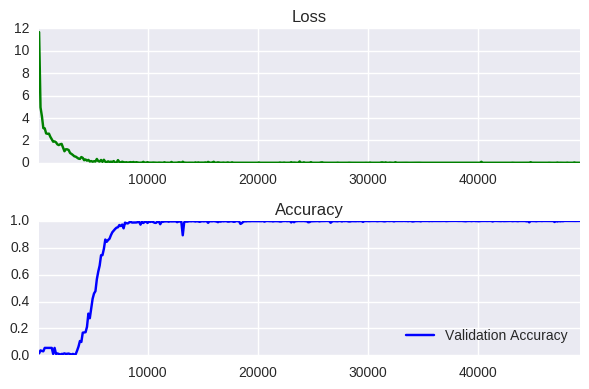

Best Validation loss at 1.5280513867440664e-05 last iteration 46001
Validation accuracy at 0.9992348890589136


In [15]:
n_epochs = 200
epoch = 0

batch_size = 128 
done_training = False
# The accuracy measured against the validation set
valid_accuracy = 0.0
best_valid_loss = np.inf
last_iteration = 0
improvement_threshold = 0.995

# Measurements use for graphing loss and accuracy
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

save_dir =  'model1s/'

saver = tf.train.Saver(tf.global_variables())
init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(X_train)/batch_size))

    while (epoch < n_epochs) and (not done_training):
        epoch = epoch + 1
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch, n_epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            iteration = (epoch - 1) * batch_count + batch_i
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            X_batch = X_train[batch_start:batch_start + batch_size]
            y_batch = y_train[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run([optimizer, loss],feed_dict={X: X_batch, y: y_batch, keep_prob:0.5, is_training:True})

            # Log every 50 batches
            if not iteration % batch_size:
                # Calculate Training and Validation accuracy
                #training_accuracy = evaluate(X_train, y_train)
                valid_accuracy, valid_loss = evaluate(X_valid, y_valid)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(batch_size + previous_batch)
                loss_batch.append(l)
                #train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(valid_accuracy)
            
            if not iteration % 512:
                if valid_loss < best_valid_loss*improvement_threshold:
                    best_valid_loss = valid_loss
                    last_iteration = iteration
                    checkpoint_path = os.path.join(save_dir, 'model.ckpt')
                    saver.save(session, checkpoint_path, global_step=iteration)
                
            if last_iteration - iteration > 987:
                done_training = True
                break
        

        # Check accuracy against Validation data
        validation_accuracy, valid_loss = evaluate(X_valid, y_valid)
        print('Validation accuracy at {}'.format(validation_accuracy))
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            last_iteration = iteration
            checkpoint_path = os.path.join(save_dir, 'session.ckpt')
            saver.save(session, checkpoint_path, global_step=iteration)
        
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
#acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Best Validation loss at {} last iteration {}'.format(best_valid_loss, last_iteration))
print('Validation accuracy at {}'.format(validation_accuracy))

In [16]:
with tf.Session() as session:
        saver = tf.train.Saver(tf.global_variables())
        ckpt = tf.train.latest_checkpoint(save_dir)
        saver.restore(session, ckpt)
        test_acc, test_loss = evaluate(X_test, y_test)
print(test_acc, test_loss)

0.968566904121 0.00146503661459


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [18]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [19]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.